<a href="https://colab.research.google.com/github/Chandu106/Trafficsign_classification/blob/main/Trafficsign_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
import zipfile

zip_ref = zipfile.ZipFile("drive/My Drive/archive (5).zip", "r")
zip_ref.extractall()
zip_ref.close()

## **READING THE DATA, AND SPLITTING INTO TRAINING, TESTING, AND VALIDATION DATA IN 80:10:10 RATI0**


In [4]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
!pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import splitfolders
splitfolders.ratio('/content/train', output="/content/output2", seed=1337, ratio=(0.8, 0.1, 0.1))

Copying files: 39209 files [00:09, 4328.58 files/s]


In [7]:
train_dir="/content/output2/train"
test_dir="/content/output2/test/"

# **DATA PREPROCESSING**

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')
     

Found 31367 images belonging to 43 classes.
Found 3922 images belonging to 43 classes.


## **VIEWING THE CLASS NAMES OF THE DATA**

In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
     

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


## **ACCURACY AND LOSS CURVES FUNCTION FOR THE MODELS**

In [10]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();



## **REQUIRED IMPORTS TO BUILD THE MODEL**

In [11]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D,Dense

# **FIRST MODEL**

In [33]:
#CREATING MODEL_01


model_01 = Sequential()

#CONVOLUTIONAL LAYER
model_01.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_01.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN LAYER TO MATCH THE SIZE OF THE OUTPUT
model_01.add(Flatten())

model_01.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model_01.add(Dense(43, activation='softmax'))

#COMPILE THE MODEL_01

model_01.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#FITTING THE MODEL_01

history_1 = model_01.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
981/981 [==============================] - 73s 62ms/step - loss: 1.0743 - accuracy: 0.7569 - val_loss: 0.3601 - val_accuracy: 0.8960
Epoch 2/5
981/981 [==============================] - 60s 61ms/step - loss: 0.1663 - accuracy: 0.9534 - val_loss: 0.3065 - val_accuracy: 0.9184
Epoch 3/5
981/981 [==============================] - 74s 75ms/step - loss: 0.1039 - accuracy: 0.9722 - val_loss: 0.3727 - val_accuracy: 0.9166
Epoch 4/5
981/981 [==============================] - 69s 71ms/step - loss: 0.0880 - accuracy: 0.9773 - val_loss: 0.4914 - val_accuracy: 0.8860
Epoch 5/5
981/981 [==============================] - 61s 62ms/step - loss: 0.0531 - accuracy: 0.9864 - val_loss: 0.3957 - val_accuracy: 0.9261


In [34]:
#EVALUATING OUR MODEL_01 PERFORMANCE ON TEST DATA

model_01.evaluate(test_data)

123/123 [==============================] - 6s 47ms/step - loss: 0.3957 - accuracy: 0.9261


[0.3956666886806488, 0.9260581135749817]

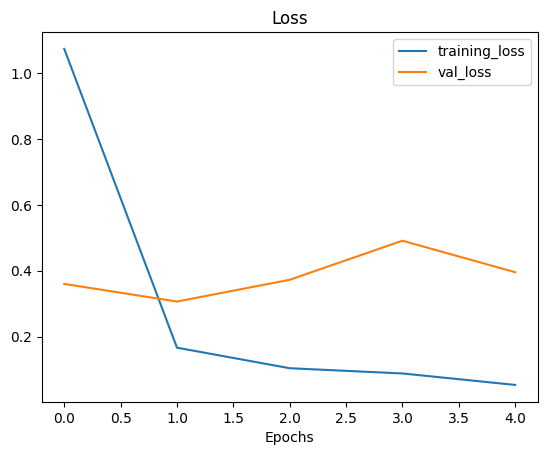

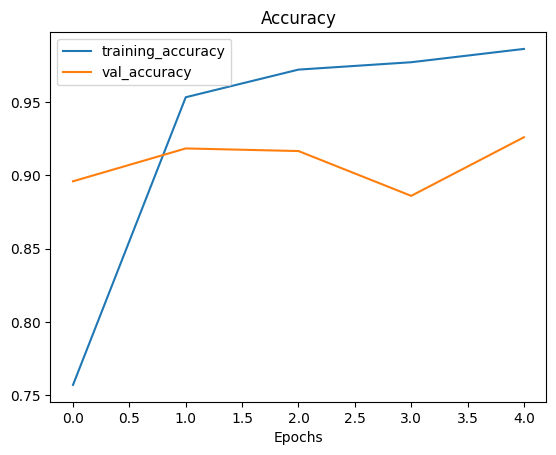

In [36]:
#MODEL_01 ACCURACY AND LOSS CURVES

plot_loss_curves(history_1)

In [37]:
#SUMMARY OF MODEL_01

model_01.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 394272)            0         
                                                                 
 dense_12 (Dense)            (None, 256)               100933888 
                                                                 
 dense_13 (Dense)            (None, 43)                11051     
                                                                 
Total params: 100,945,835
Trainable params: 100,945,835
Non-trainable params: 0
________________________________________

# **SECOND MODEL**

In [38]:
#CREATING MODEL_02


model_02 = Sequential()

#CONVOLUTIONAL LAYER
model_02.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_02.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_02.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_02.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN LAYER TO MATCH THE SIZE OF THE OUTPUT
model_02.add(Flatten())

model_02.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model_02.add(Dense(43, activation='softmax'))

#COMPILE THE MODEL_02

model_02.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#FITTING THE MODEL_02

history_02 = model_02.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
981/981 [==============================] - 75s 74ms/step - loss: 0.8881 - accuracy: 0.7520 - val_loss: 0.3221 - val_accuracy: 0.9102
Epoch 2/5
981/981 [==============================] - 59s 60ms/step - loss: 0.1841 - accuracy: 0.9462 - val_loss: 0.2267 - val_accuracy: 0.9365
Epoch 3/5
981/981 [==============================] - 57s 58ms/step - loss: 0.1044 - accuracy: 0.9703 - val_loss: 0.1722 - val_accuracy: 0.9559
Epoch 4/5
981/981 [==============================] - 54s 55ms/step - loss: 0.0801 - accuracy: 0.9784 - val_loss: 0.2181 - val_accuracy: 0.9465
Epoch 5/5
981/981 [==============================] - 56s 57ms/step - loss: 0.0596 - accuracy: 0.9848 - val_loss: 0.3262 - val_accuracy: 0.9281


In [39]:
#EVALUATING OUR MODEL_02 PERFORMANCE ON TEST DATA

model_02.evaluate(test_data)

123/123 [==============================] - 6s 51ms/step - loss: 0.3262 - accuracy: 0.9281


[0.3262263238430023, 0.9280979037284851]

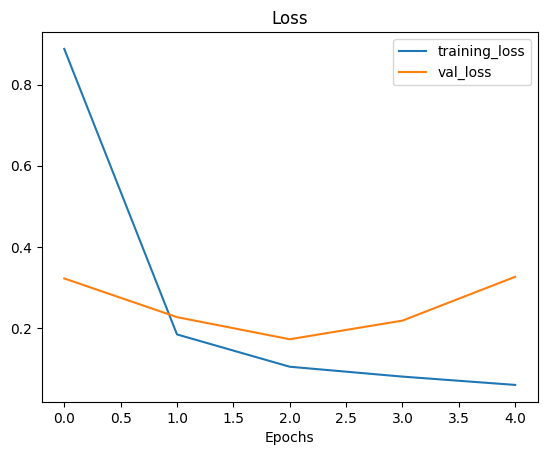

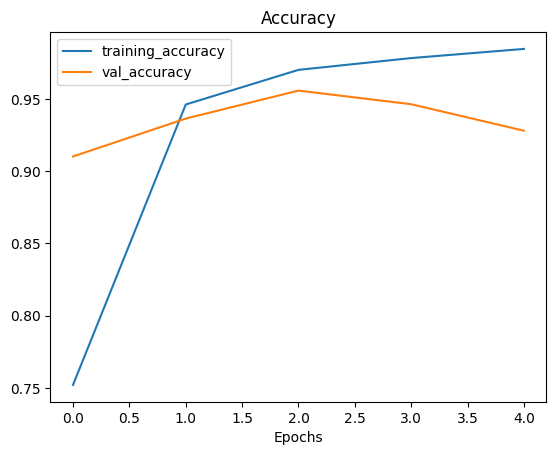

In [40]:
#MODEL_02 ACCURACY AND LOSS CURVES

plot_loss_curves(history_02)

In [41]:
#SUMMARY OF MODEL_02

model_02.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 93312)             0         
                                                                 
 dense_14 (Dense)            (None, 256)              

# **THIRD MODEL**

In [43]:
#CREATING MODEL_03


model_03 = Sequential()

#CONVOLUTIONAL LAYER
model_03.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_03.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_03.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_03.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_03.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_03.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN LAYER TO MATCH THE SIZE OF THE OUTPUT
model_03.add(Flatten())

model_03.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model_03.add(Dense(43, activation='softmax'))

#COMPILE THE MODEL_03

model_03.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#FITTING THE MODEL_03

history_03 = model_03.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
981/981 [==============================] - 98s 95ms/step - loss: 0.9086 - accuracy: 0.7345 - val_loss: 0.2896 - val_accuracy: 0.9108
Epoch 2/5
981/981 [==============================] - 87s 89ms/step - loss: 0.1789 - accuracy: 0.9475 - val_loss: 0.1523 - val_accuracy: 0.9539
Epoch 3/5
981/981 [==============================] - 87s 89ms/step - loss: 0.0968 - accuracy: 0.9718 - val_loss: 0.2126 - val_accuracy: 0.9490
Epoch 4/5
981/981 [==============================] - 87s 89ms/step - loss: 0.0765 - accuracy: 0.9766 - val_loss: 0.2146 - val_accuracy: 0.9470
Epoch 5/5
981/981 [==============================] - 87s 89ms/step - loss: 0.0648 - accuracy: 0.9796 - val_loss: 0.1653 - val_accuracy: 0.9640


In [44]:
#EVALUATING OUR MODEL_03 PERFORMANCE ON TEST DATA

model_03.evaluate(test_data)

123/123 [==============================] - 7s 53ms/step - loss: 0.1653 - accuracy: 0.9640


[0.1652577817440033, 0.9640489816665649]

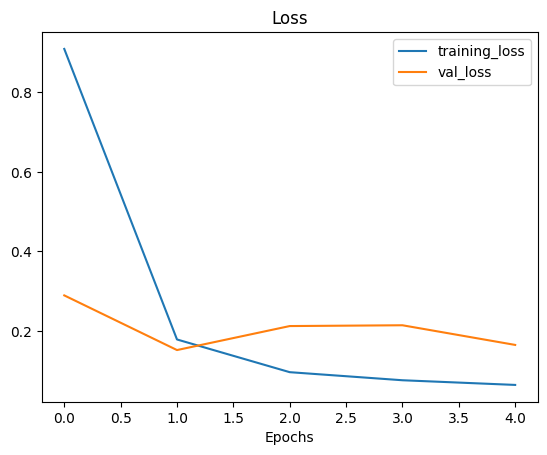

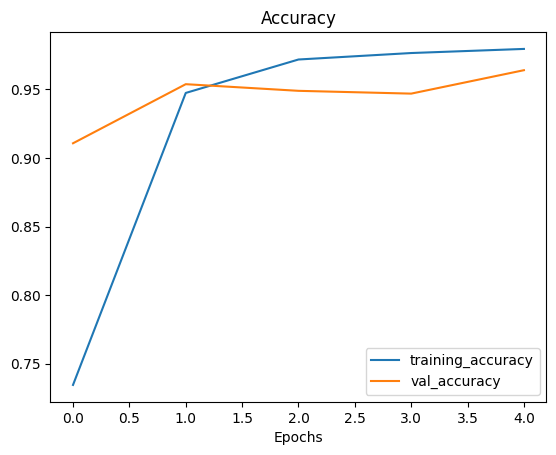

In [45]:
#MODEL_03 ACCURACY AND LOSS CURVES

plot_loss_curves(history_03)

In [46]:
#SUMMARY OF MODEL_03

model_03.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_12 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 108, 108, 32)      9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 32)       0         
 g2D)                                                

# **FOURTH MODEL**

In [47]:
#CREATING MODEL_04


model_04 = Sequential()

#CONVOLUTIONAL LAYER
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_04.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_04.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_04.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_04.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN LAYER TO MATCH THE SIZE OF THE OUTPUT
model_04.add(Flatten())

model_04.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model_04.add(Dense(43, activation='softmax'))

#COMPILE THE MODEL_04

model_04.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#FITTING THE MODEL_04

history_04 = model_04.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
981/981 [==============================] - 143s 138ms/step - loss: 0.6809 - accuracy: 0.8203 - val_loss: 0.1868 - val_accuracy: 0.9516
Epoch 2/5
981/981 [==============================] - 131s 134ms/step - loss: 0.0949 - accuracy: 0.9748 - val_loss: 0.0808 - val_accuracy: 0.9804
Epoch 3/5
981/981 [==============================] - 135s 138ms/step - loss: 0.0683 - accuracy: 0.9806 - val_loss: 0.0893 - val_accuracy: 0.9783
Epoch 4/5
981/981 [==============================] - 130s 133ms/step - loss: 0.0337 - accuracy: 0.9905 - val_loss: 0.0704 - val_accuracy: 0.9847
Epoch 5/5
981/981 [==============================] - 130s 133ms/step - loss: 0.0346 - accuracy: 0.9909 - val_loss: 0.1117 - val_accuracy: 0.9834


In [48]:
#EVALUATING OUR MODEL_04 PERFORMANCE ON TEST DATA

model_04.evaluate(test_data)

123/123 [==============================] - 6s 51ms/step - loss: 0.1117 - accuracy: 0.9834


[0.11173753440380096, 0.9834268093109131]

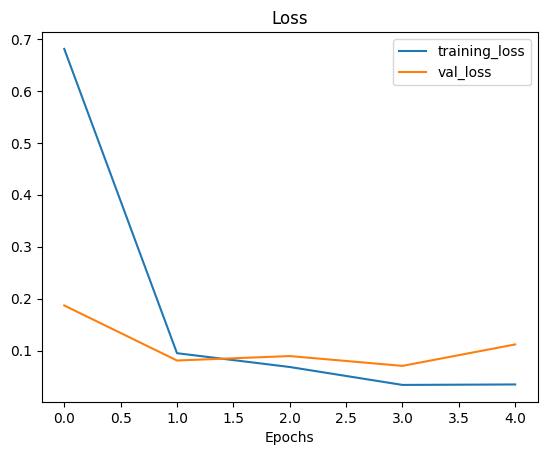

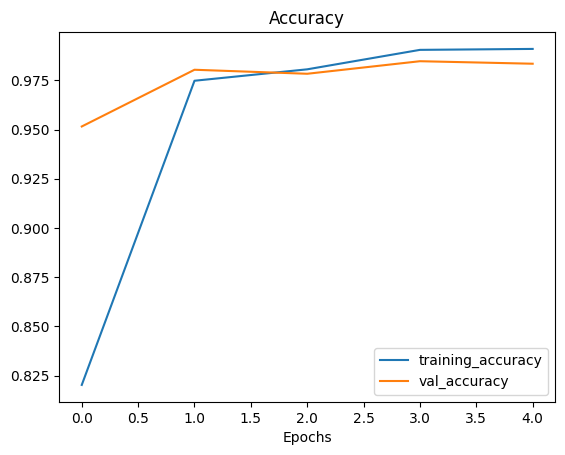

In [49]:
#MODEL_04 ACCURACY AND LOSS CURVES

plot_loss_curves(history_04)

In [50]:
#SUMMARY OF MODEL_04

model_04.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 109, 109, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 107, 107, 32)      9248      
                                                                 
 conv2d_19 (Conv2D)          (None, 105, 105, 32)      9248      
                                                     

In [51]:
#CREATING MODEL_05


model_05 = Sequential()

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#CONVOLUTIONAL LAYER
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))
model_05.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'))

#MAXPOOLING LAYER
model_05.add(MaxPool2D(pool_size=(2,2)))

#FLATTEN LAYER TO MATCH THE SIZE OF THE OUTPUT
model_05.add(Flatten())

model_05.add(Dense(256, activation='relu'))

#OUTPUT LAYER
model_05.add(Dense(43, activation='softmax'))

#COMPILE THE MODEL_05

model_05.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

#FITTING THE MODEL_05

history_05 = model_05.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
981/981 [==============================] - 186s 180ms/step - loss: 1.0731 - accuracy: 0.7094 - val_loss: 0.1520 - val_accuracy: 0.9605
Epoch 2/5
981/981 [==============================] - 177s 181ms/step - loss: 0.0797 - accuracy: 0.9783 - val_loss: 0.0776 - val_accuracy: 0.9824
Epoch 3/5
981/981 [==============================] - 173s 176ms/step - loss: 0.0529 - accuracy: 0.9850 - val_loss: 0.0788 - val_accuracy: 0.9837
Epoch 4/5
981/981 [==============================] - 172s 176ms/step - loss: 0.0330 - accuracy: 0.9898 - val_loss: 0.0575 - val_accuracy: 0.9867
Epoch 5/5
981/981 [==============================] - 172s 175ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0556 - val_accuracy: 0.9888


In [52]:
#EVALUATING OUR MODEL_05 PERFORMANCE ON TEST DATA

model_05.evaluate(test_data)

123/123 [==============================] - 7s 55ms/step - loss: 0.0556 - accuracy: 0.9888


[0.055591315031051636, 0.988781213760376]

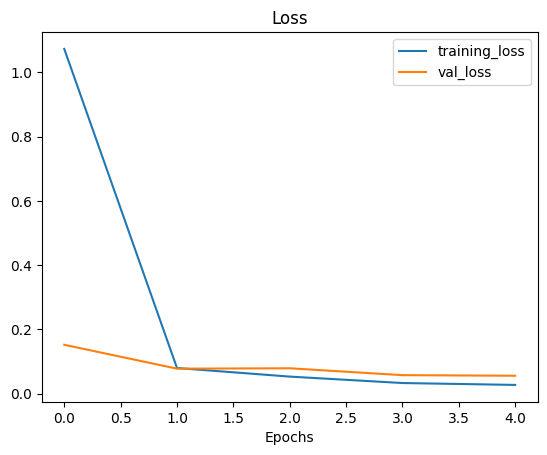

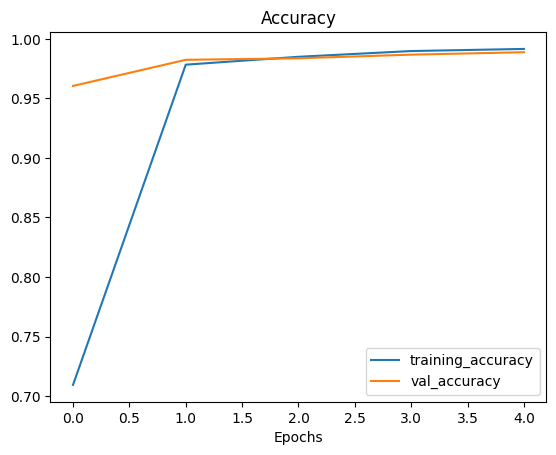

In [53]:
#MODEL_05 ACCURACY AND LOSS CURVES

plot_loss_curves(history_05)

In [54]:
#SUMMARY OF MODEL_05

model_05.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 conv2d_26 (Conv2D)          (None, 218, 218, 32)      9248      
                                                                 
 conv2d_27 (Conv2D)          (None, 216, 216, 32)      9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 108, 108, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 106, 106, 32)      9248      
                                                     